In [ ]:
import numpy as np
import pandas as pd
import multiprocessing

import matplotlib.pyplot as plt
import bokeh
import bokeh.io
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

# init_notebook_mode()

import seaborn as sns

import re
import math
import copy

from collections import defaultdict
import csv
import itertools
import datetime 
from datetime import datetime
import time
import dateutil.parser
import pickle
import random

import gc
import zipfile
import sys, getopt
import os

from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

import dask.dataframe as dd
#from chest import Chest

InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last"

# Magic function to make matplotlib inline
%matplotlib inline

%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

import dask.dataframe as ddf
import dask.array as da

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 800)

In [ ]:
# import plotly
# plotly.tools.set_credentials_file(username='duplinskiy', api_key='RsZHhxIiAGGu7FN9P4bu')
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import cufflinks as cf

# cf.go_offline()

import statistics as stat

import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='duplinskiy', api_key='RsZHhxIiAGGu7FN9P4bu')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

cf.go_offline()

In [ ]:
import os
os.getcwd()

## Data

In [ ]:
dat0 = pd.read_csv('data/ch4k_df_eu.csv')

ref_dat0 = pd.read_csv('data/dat_ref.csv', low_memory = False, index_col = 0,
                     usecols = ['group_article', 'price_band', 'age_group_descr', 
                                'brand_descr', 'sub_brand_descr',
                                'rmh_retail_department_descr', 'rmh_category_descr', 'rmh_gender_descr',
                                'rmh_retail_section_descr', 'rmh_product_division_descr',
                                'rmh_product_type_descr', 'product_franchise_descr'])

In [ ]:
dat = dat0.copy()

dat.dropna(inplace = True)

dat = dat[(dat.season_net_qty > 250) &
          (dat.country == 'EU')]

ref_dat = ref_dat.copy()

ref_dat = ref_dat.reset_index().drop_duplicates()[['group_article', 'rmh_product_type_descr']]
dat = pd.merge(dat, ref_dat, left_on='article_number', right_on='group_article', how = 'left')

key = {'FW16': 1, 'SS17': 2, 'FW17': 3, 'SS18': 4, 'FW18': 5, 'SS19': 6, 'FW19': 7, 'SS20': 8}
dat['order_key'] = [key[s] for s in dat.season]

## Action

In [ ]:
a = np.random.choice(dat.article_number.unique(), size = 1, replace = False)[0]
article = dat[dat.article_number == a].copy() # article data
prod_type_descr = article['rmh_product_type_descr'].iloc[0] # product type

articles = dat[dat.rmh_product_type_descr == prod_type_descr] # e.g. all articles of the tyep

In [ ]:
articles = pd.DataFrame(articles.groupby(['year', 'week'])['net_qty'].mean()) # weekly mean
articles.sort_values(['year', 'week'], inplace = True)


In [ ]:
article = article[['article_number', 'year', 'week', 'net_qty']].sort_values(['year', 'week'])
article


## Plots

In [ ]:
pivoted = articles.reset_index().pivot(index = 'week', columns = 'year', values = 'net_qty')
pivoted['avg'] = pivoted.apply('mean', axis = 1)

plt.rcParams["figure.figsize"] = [22,9]
pivoted.plot(linewidth = 4)

# dat_a['MA'] = dat_a.net_qty.ewm(alpha = 0.5).mean()
# dat_a.plot(linewidth = 4)

pivoted

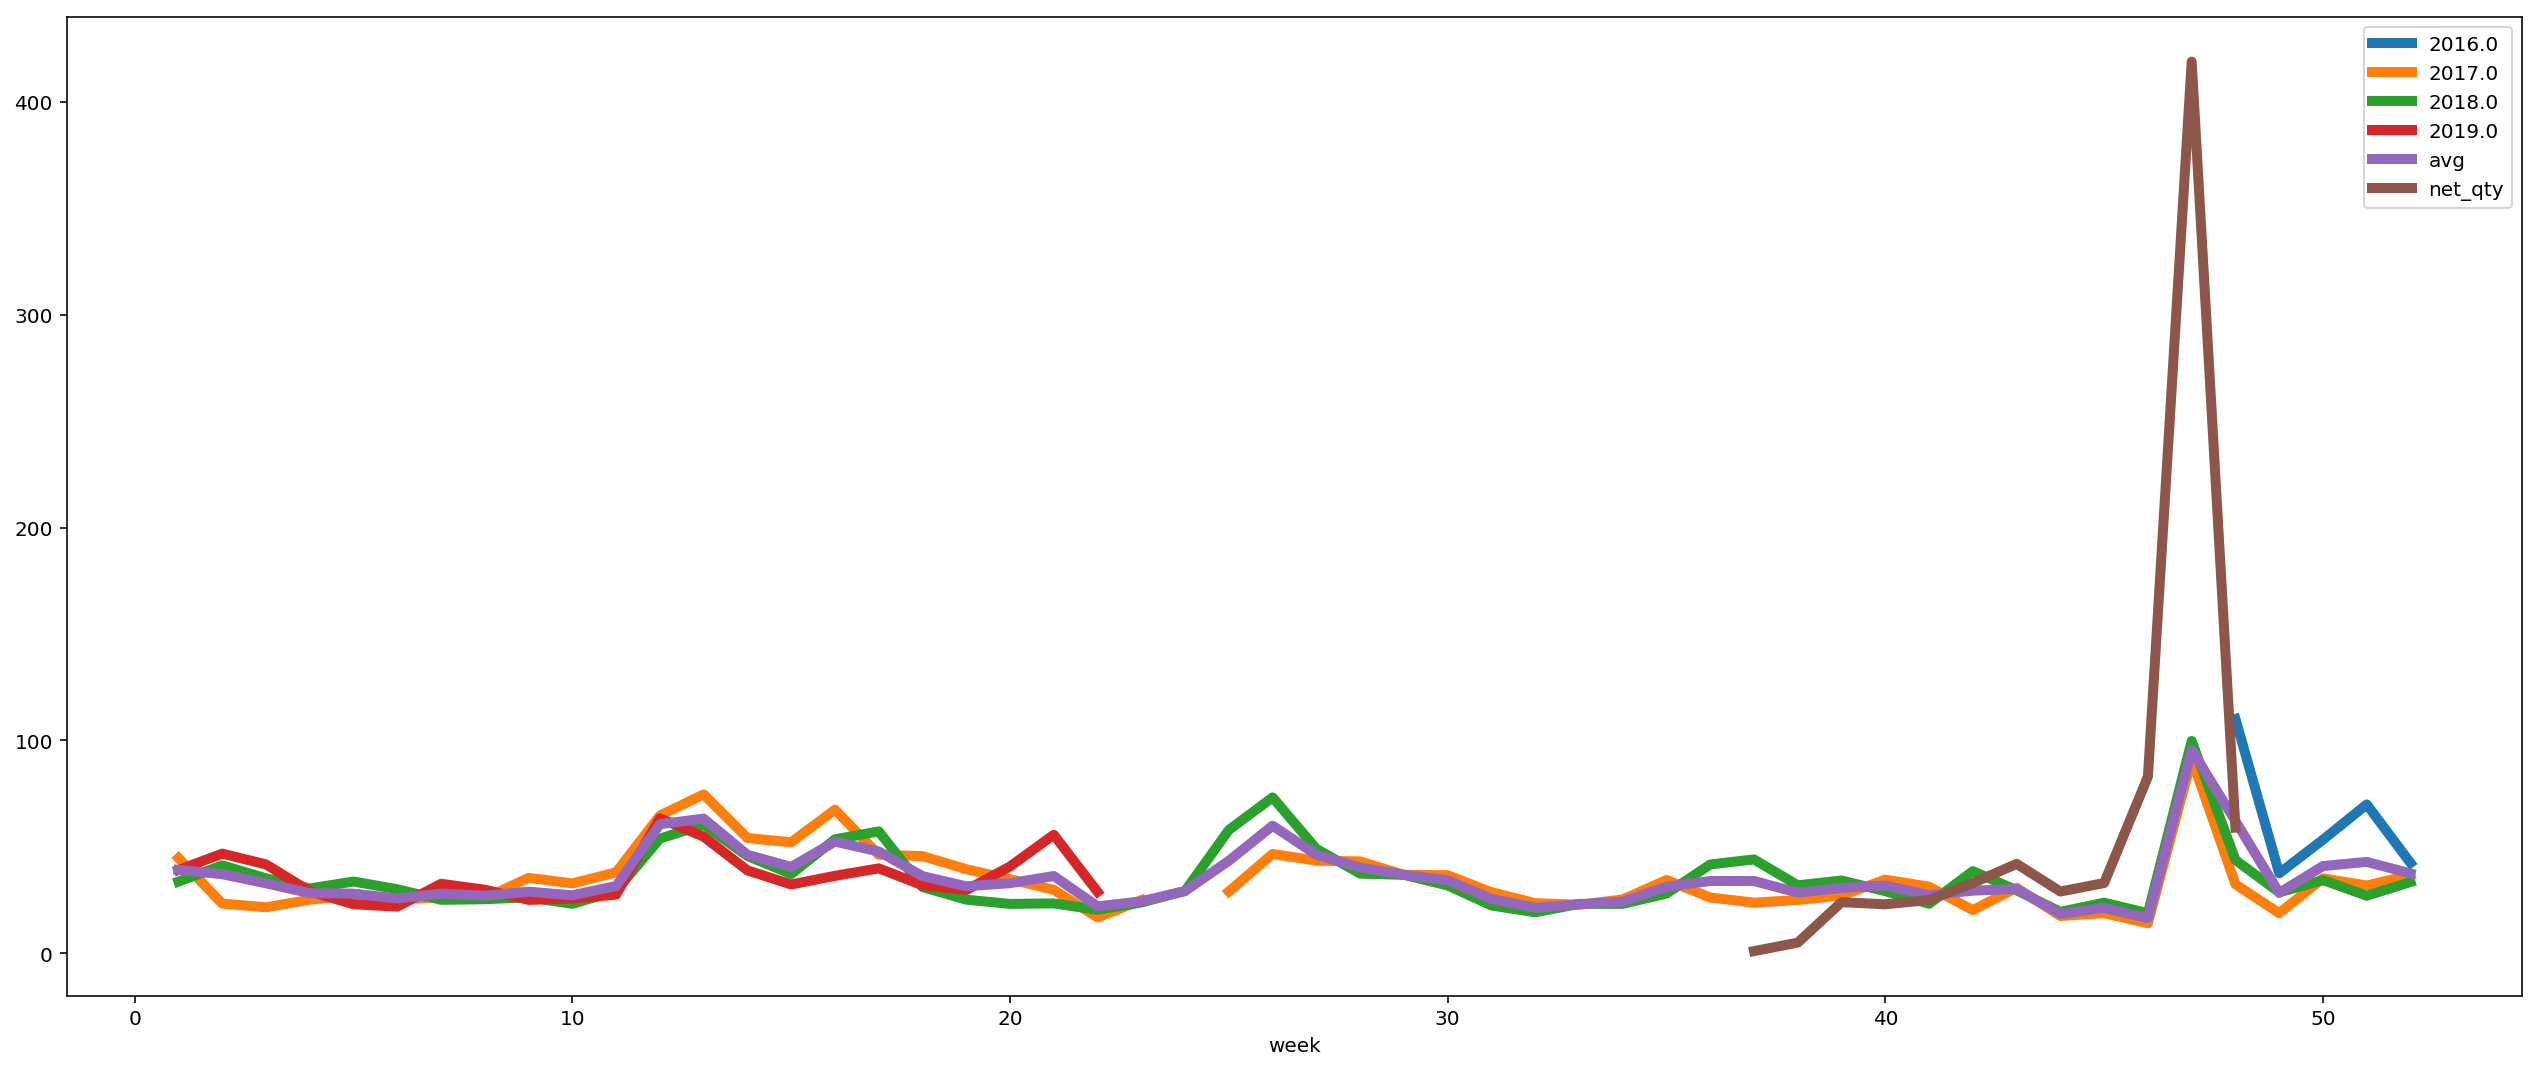

In [65]:
pd.merge(
    pivoted, article[['week','net_qty']], how = 'left', left_index=True, right_on='week'
).set_index('week').plot(linewidth = 5)





# Appendix

In [ ]:

# # ---- Add cost ----
# cost_price = pd.read_csv('Cost Price.csv', low_memory=False, index_col = 0)
# cost_price.rename(columns = {'avg(cost_of_sales)': 'cost'}, inplace = True)
# cost_price = pd.DataFrame(cost_price['cost'].groupby(cost_price.index).mean()).round()


In [ ]:
# dat.drop(['plant', 'warehouse'], axis = 1, inplace=True)

# dat.buy_availability = dat.buy_availability.round(2)

# dat.drop_duplicates(['article_number', 'consumer_order_date'], inplace = True)

# dat[dat.duplicated()]

In [ ]:
# len(set(dat2[dat2.season == 'FW18'].article_number).intersection(set(dat2[dat2.season == 'FW19'].article_number)))


In [ ]:
# ref_dat.head()

# pd.crosstab(index = ref_dat['rmh_product_type_descr'], columns = 'count')

# for c in ref_dat.columns:
#     d = ref_dat[c].unique()
#     print('***', c, '***', d)

In [ ]:
# ref_dat = pd.read_csv('data/dat_ref.csv', low_memory = False, index_col = 0,
#                      usecols = ['group_article', 'price_band', 'age_group_descr', 
#                                 'brand_descr', 'sub_brand_descr',
#                                 'rmh_retail_department_descr', 'rmh_category_descr', 'rmh_gender_descr',
#                                 'rmh_retail_section_descr', 'rmh_product_division_descr',
#                                 'rmh_product_type_descr', 'product_franchise_descr'])

# ref_dat2 = pd.read_csv('data/Article reference data.csv', low_memory = False, index_col = 0, error_bad_lines = False,
#                       usecols = ['model_no', 'key_cat_desc', 'sports_cat_desc', 'rmh_cat_desc', 
#                                  'prod_div_desc', 'prod_grp_desc', 'prod_type_desc']                      
#                       )



In [ ]:
article = 'G27706'

d = dat[dat['article_number'] == article][['consumer_order_date', 'article_number', 'buy_availability', 'gross_demand_quantity']]

pivoted = d.pivot(index = 'consumer_order_date', columns = 'article_number', values = 'buy_availability')

pivoted2 = d.pivot(index = 'consumer_order_date', columns = 'article_number', values = 'gross_demand_quantity')    

forecasts[forecasts.index == article].round()

d.round(2)
d.gross_demand_quantity.sum()

plt.rcParams["figure.figsize"] = [18,6]

pivoted.plot(linewidth = 4)
plt.title('Buy Availability Over Time')
plt.ylabel('Buy Availability')

pivoted2.plot(linewidth = 4)
plt.title('Weekly Gross Demand Quantity')
plt.ylabel('Gross Demand Quantity')


In [ ]:
import statsmodels.api as sm

mod = sm.OLS(article_s.y, article_s.X, missing='drop') # y = article, x = seasonality
mod_res = mod.fit()

mod_res.summary()

article_s['seasonal_impute'] = mod_res.predict()